HANDWRITING GENERATION
UCS748 - Generative AI Project
Student: Ramneek | Thapar Institute

✅ Device: cuda

LOADING MY TRAINED MODEL

📥 Loading model for generation...
   Model file: my_trained_handwriting_model.pth
   This is the model I trained for 20 epochs


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 194MB/s]


initialize network with N02
initialize network with N02
initialize network with N02


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth


100%|██████████| 91.2M/91.2M [00:00<00:00, 238MB/s]


✅ Model loaded successfully!
   Generator ready for handwriting generation

📊 Loading style dataset...
✅ Loaded 20 style samples from IAM dataset

TEXT GENERATION

✍️ Input text: 'UCS748 Generative AI Project'

🔤 Encoding text using my trained model...
✅ Text encoded successfully
   Encoded tensor shape: torch.Size([8, 4, 10])

GENERATING HANDWRITING

🎨 Generating handwriting using my trained model...
   Model: my_trained_handwriting_model.pth
   Text: 'UCS748 Generative AI Project'

📸 Generating samples with different handwriting styles...


Generating: 100%|██████████| 20/20 [00:04<00:00,  4.39it/s]


✅ Output images saved in: results/

GENERATED HANDWRITING RESULTS

📋 Displaying handwriting for: 'UCS748 Generative AI Project'
   Generated using: my_trained_handwriting_model.pth

✅ Generated 20 handwriting samples

Handwriting Style 0:


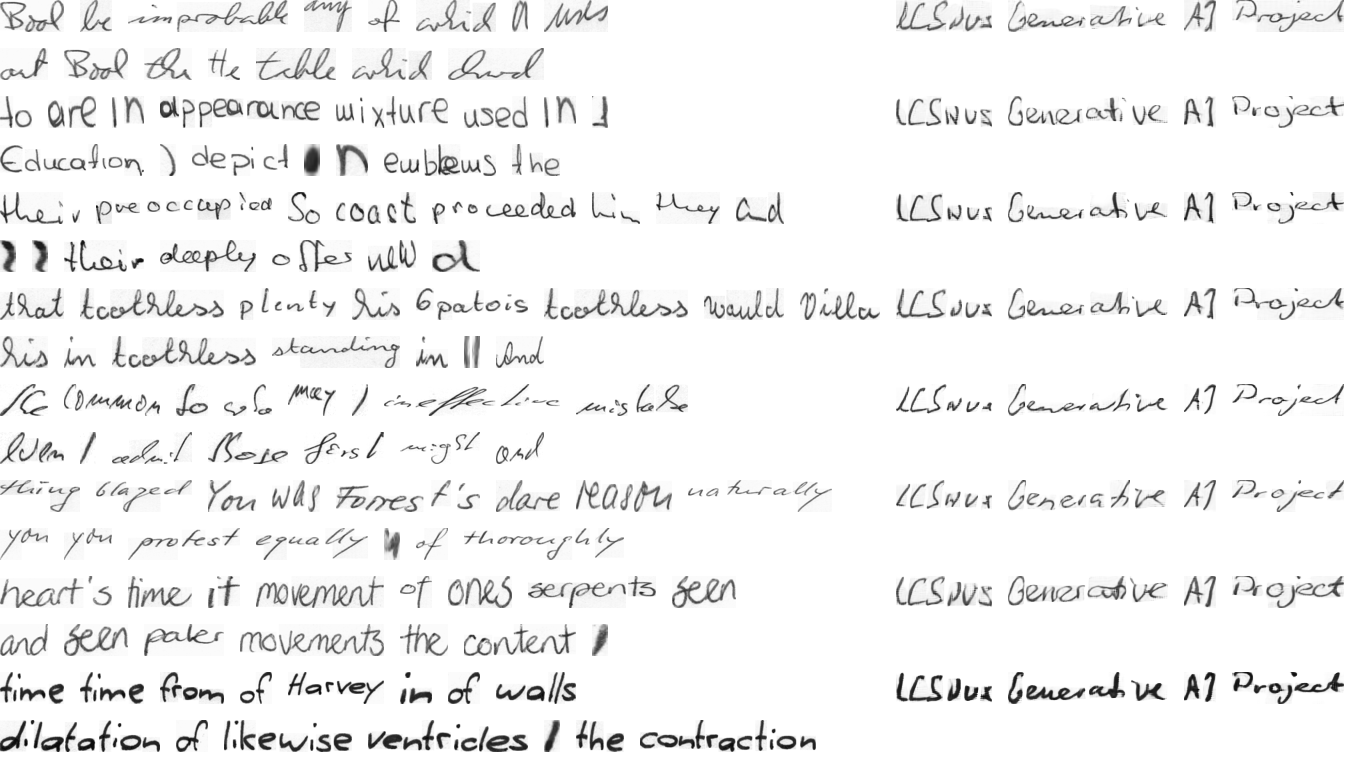

--------------------------------------------------------------------------------
Handwriting Style 1:


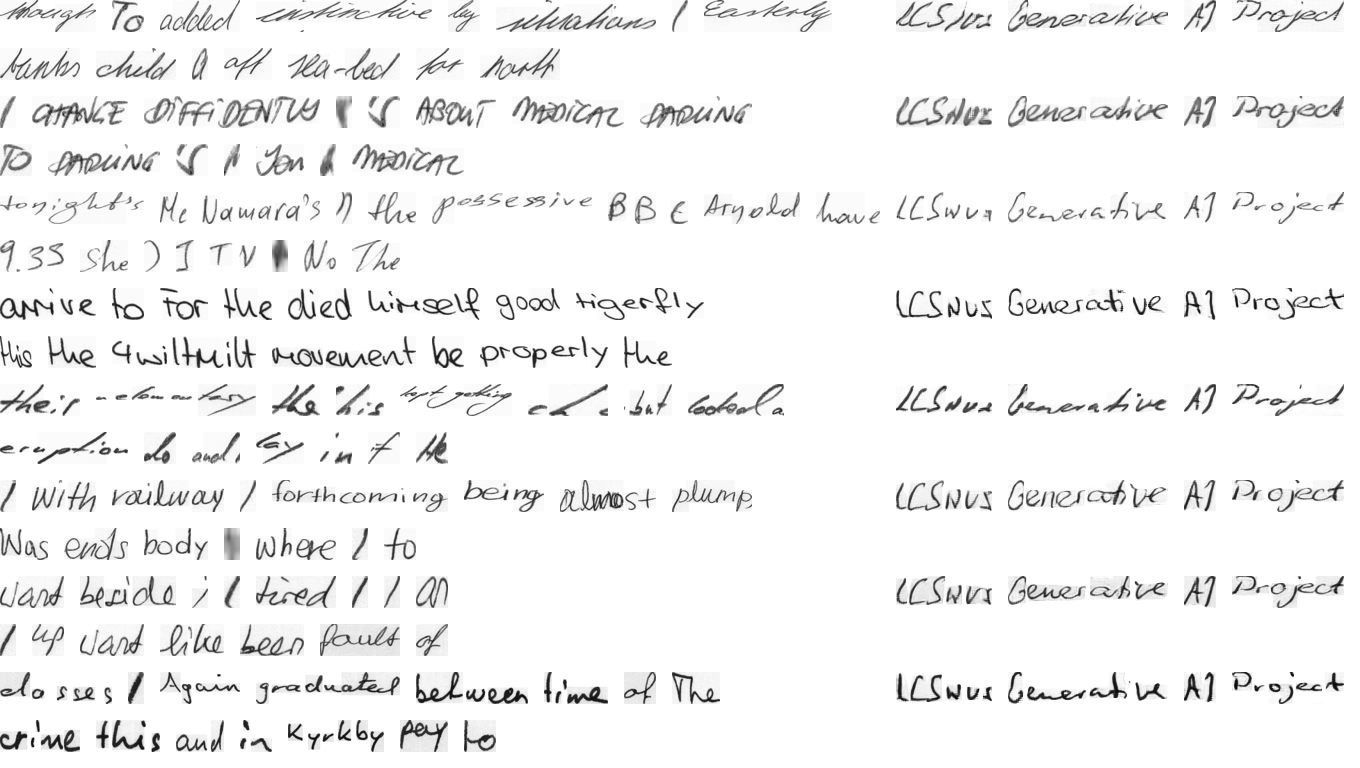

--------------------------------------------------------------------------------
Handwriting Style 2:


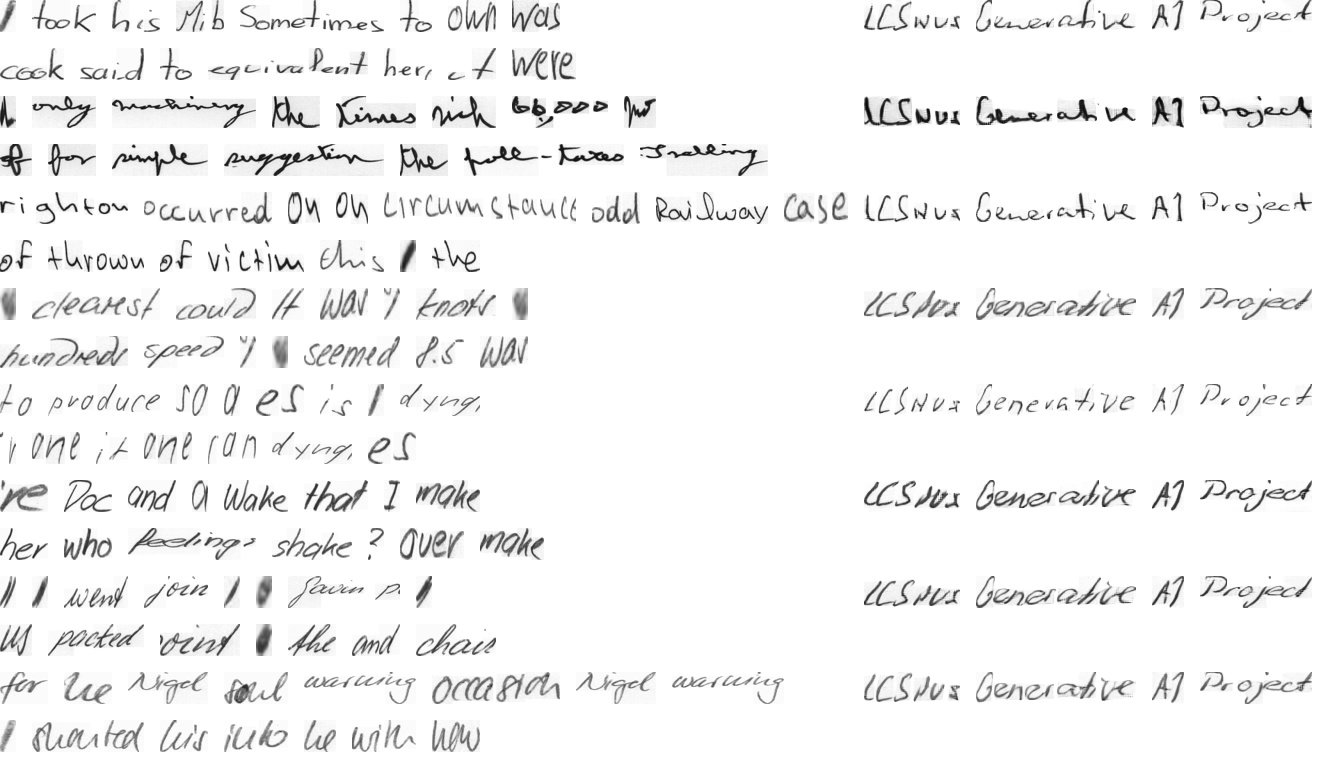

--------------------------------------------------------------------------------
Handwriting Style 3:


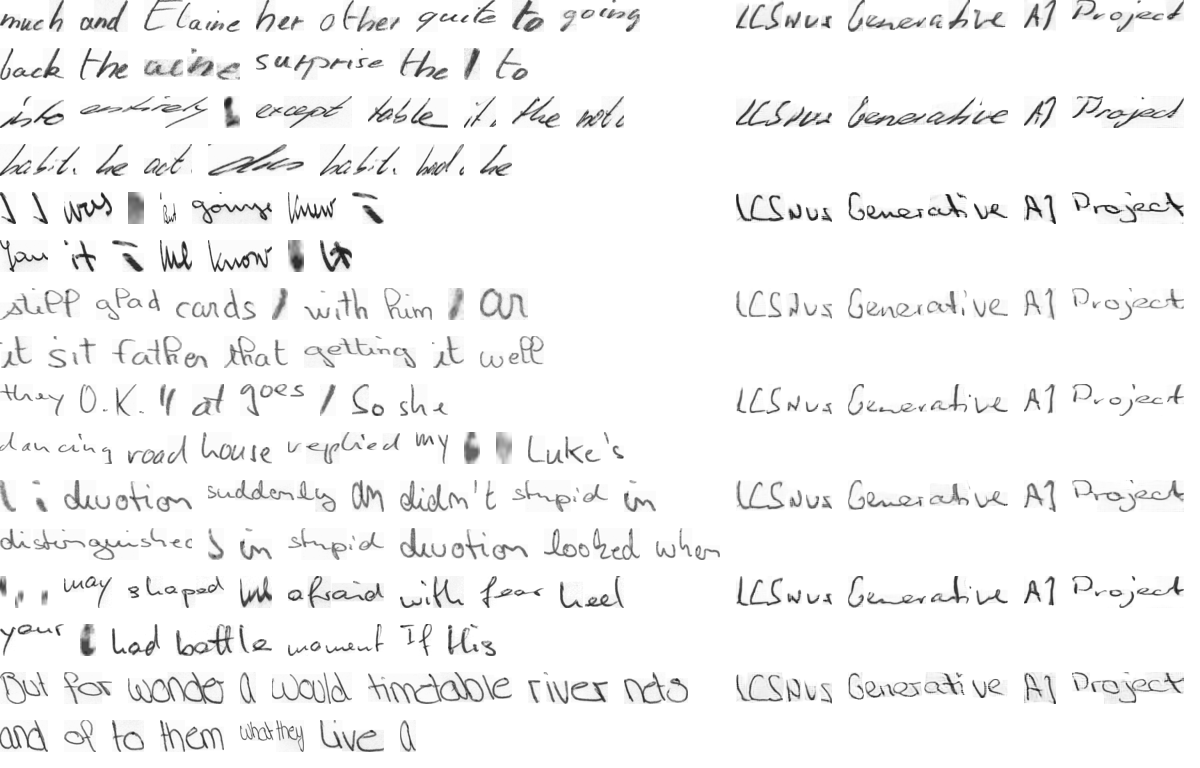

--------------------------------------------------------------------------------
Handwriting Style 4:


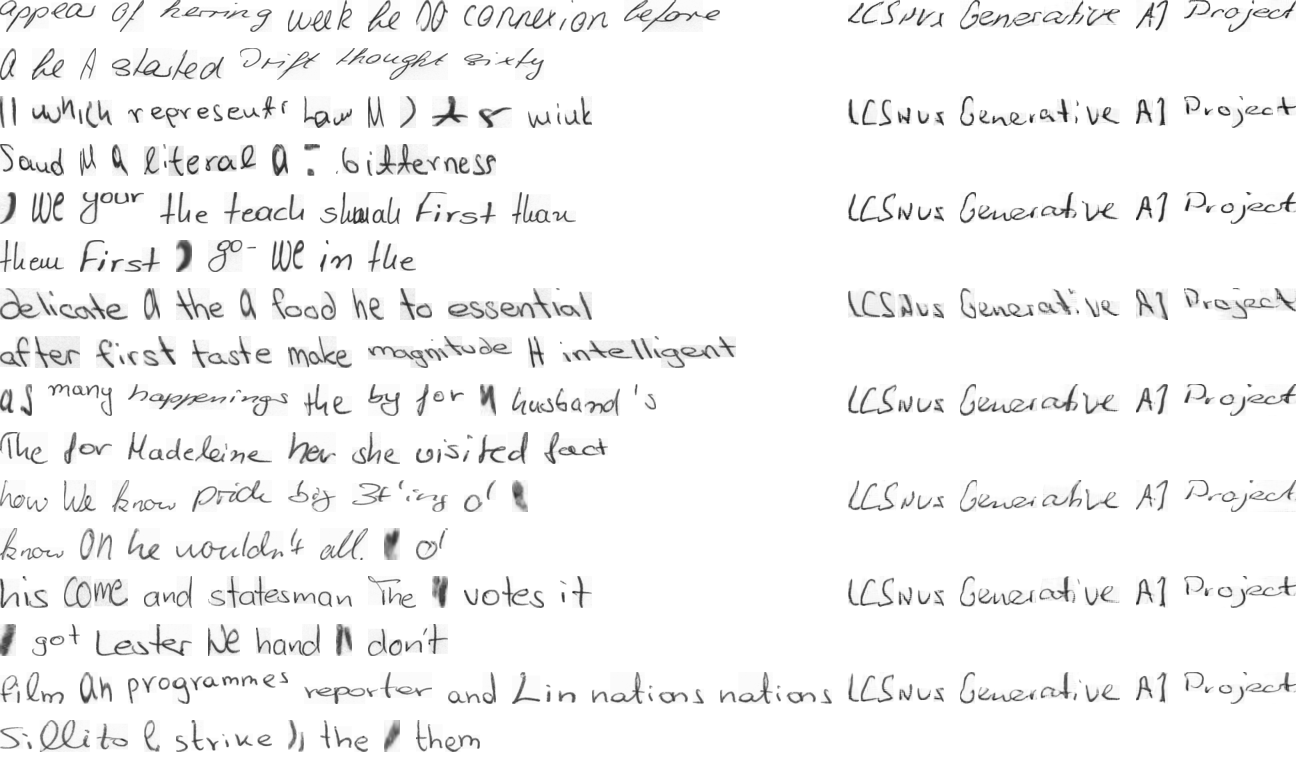

--------------------------------------------------------------------------------
Handwriting Style 5:


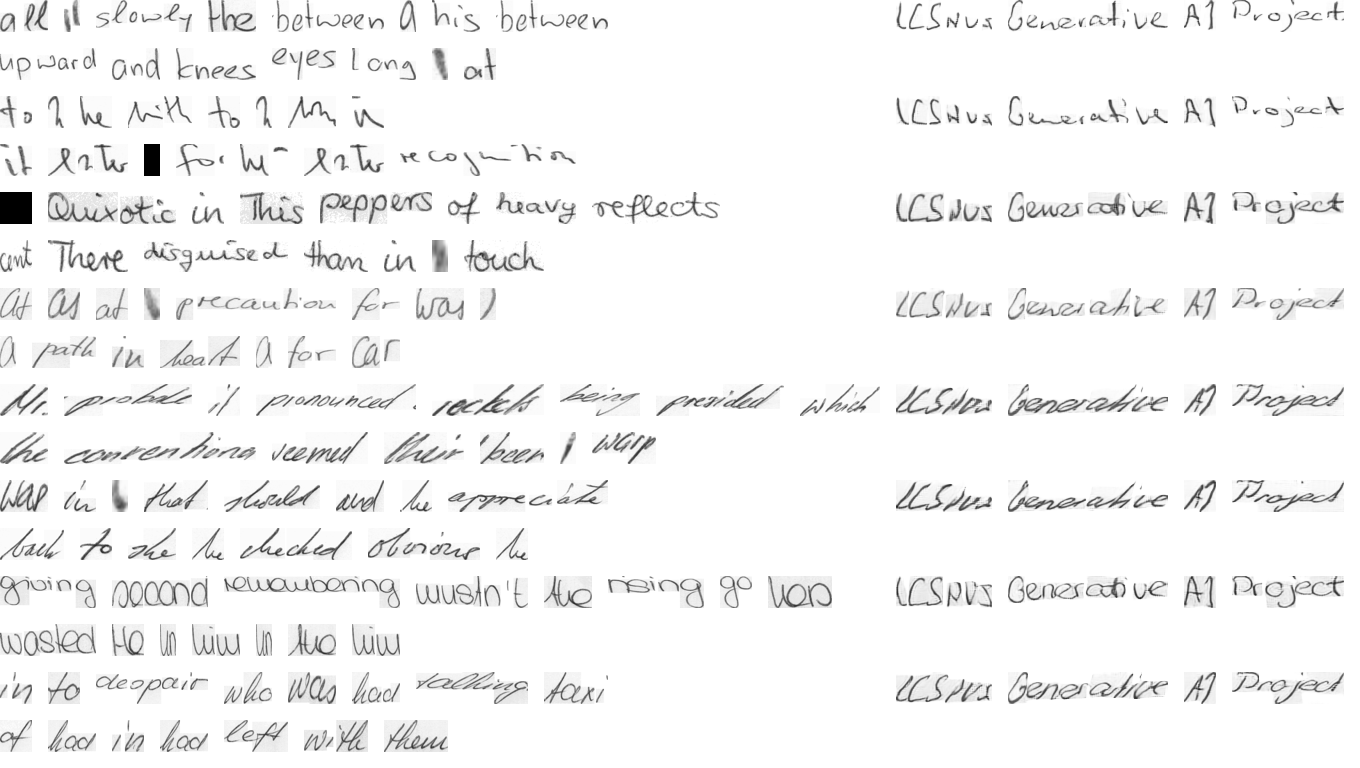

--------------------------------------------------------------------------------
Handwriting Style 6:


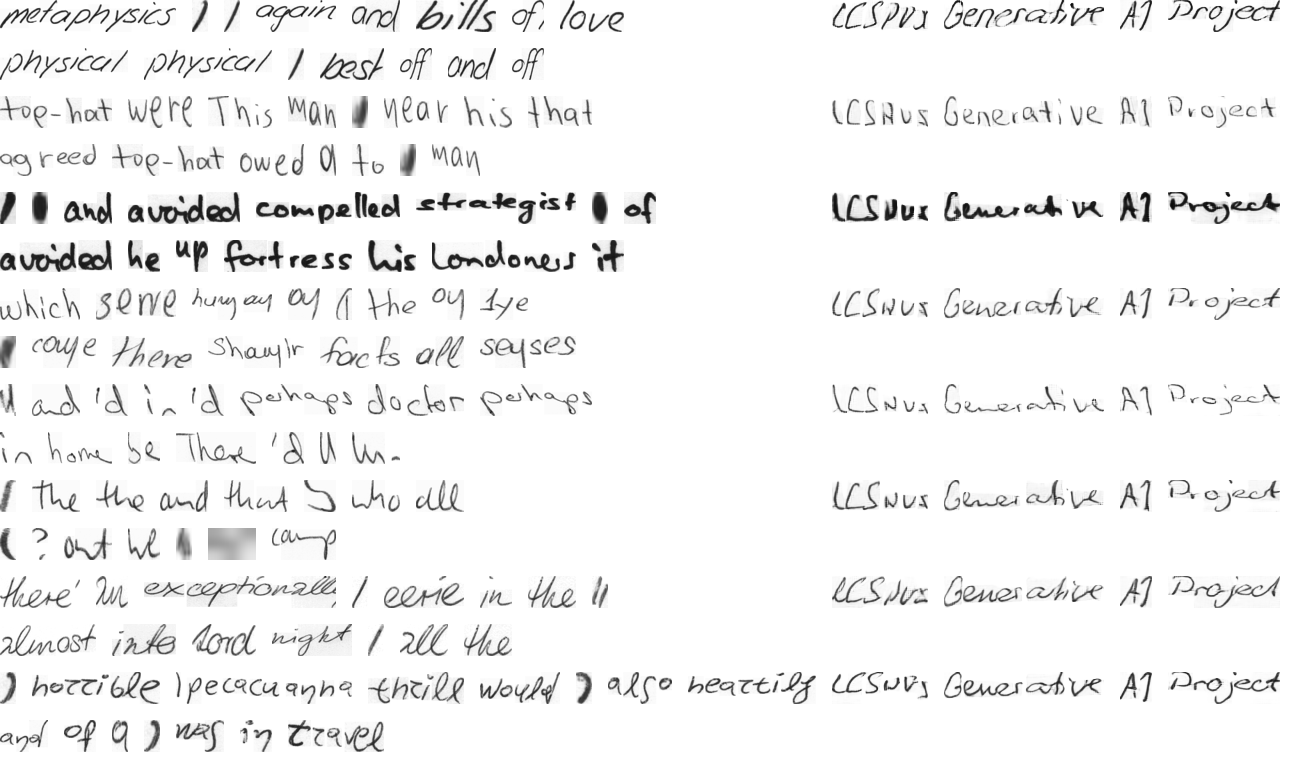

--------------------------------------------------------------------------------
Handwriting Style 7:


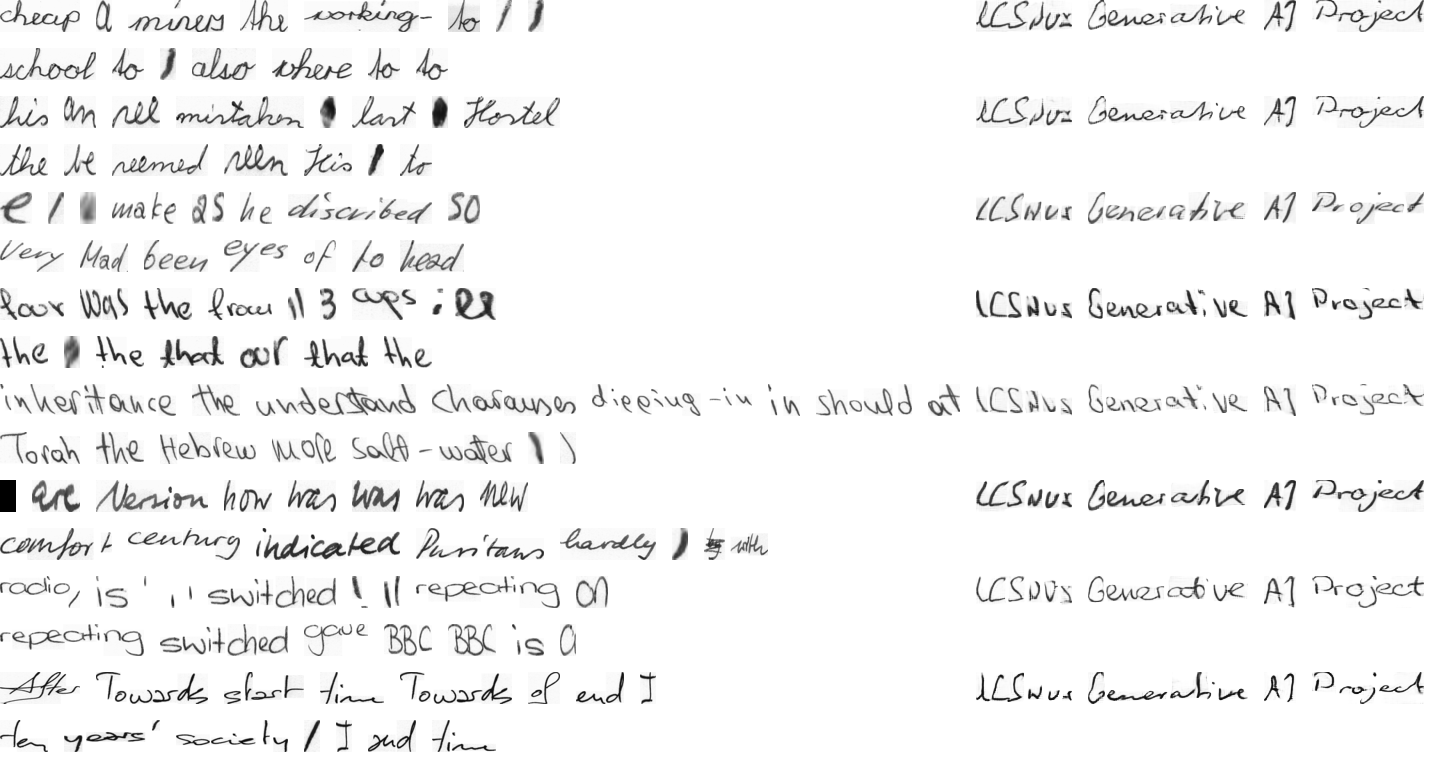

--------------------------------------------------------------------------------
Handwriting Style 8:


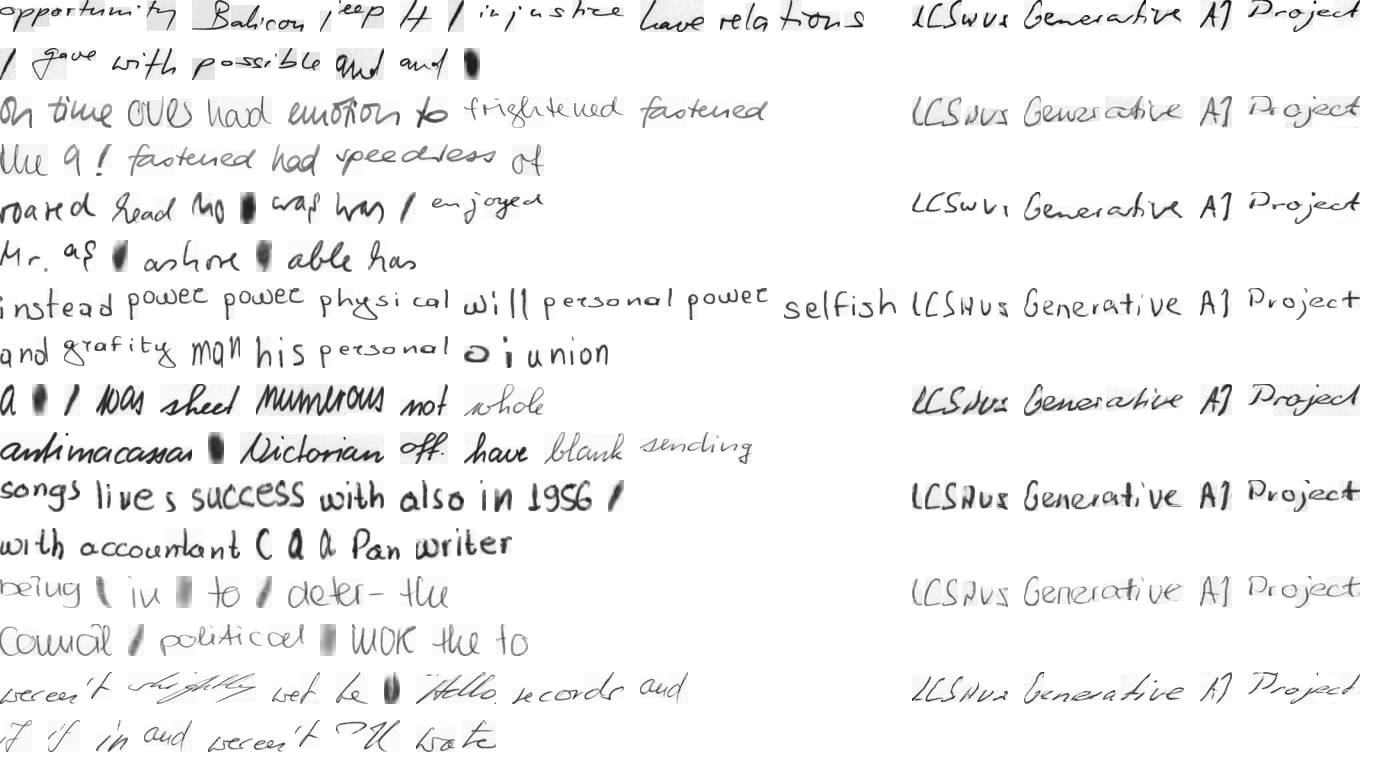

--------------------------------------------------------------------------------
Handwriting Style 9:


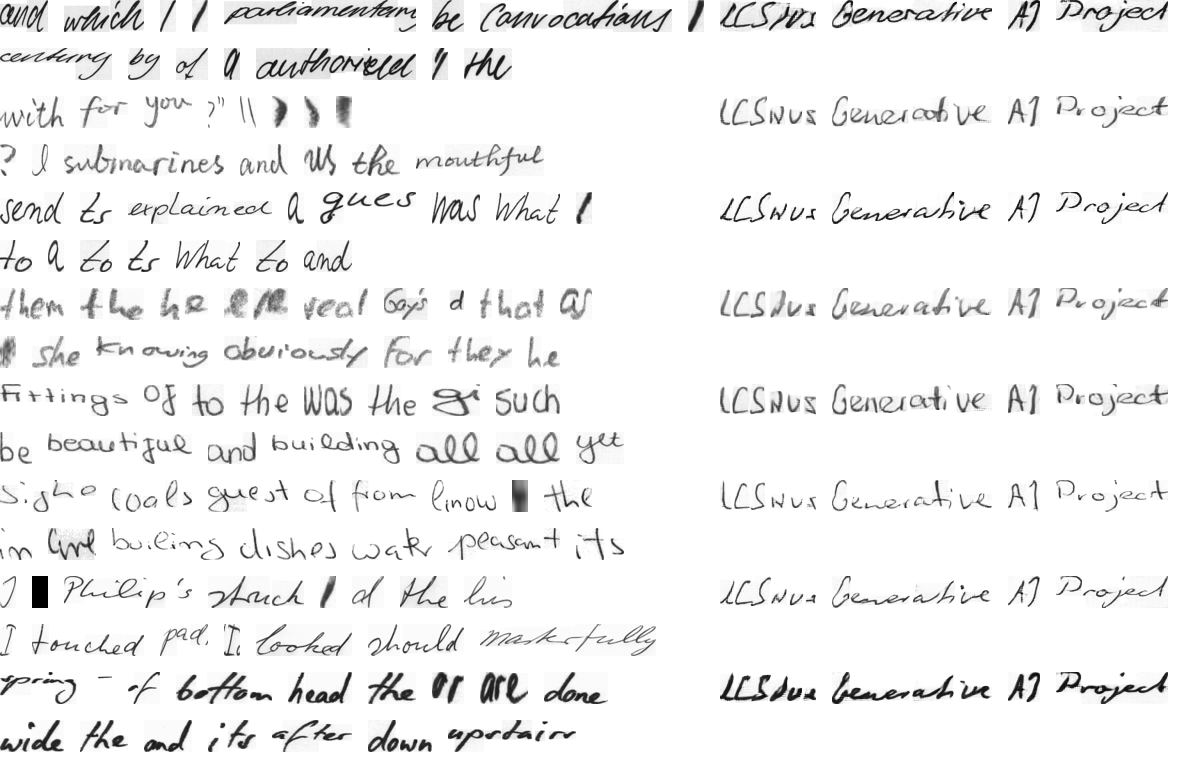

--------------------------------------------------------------------------------
Handwriting Style 10:


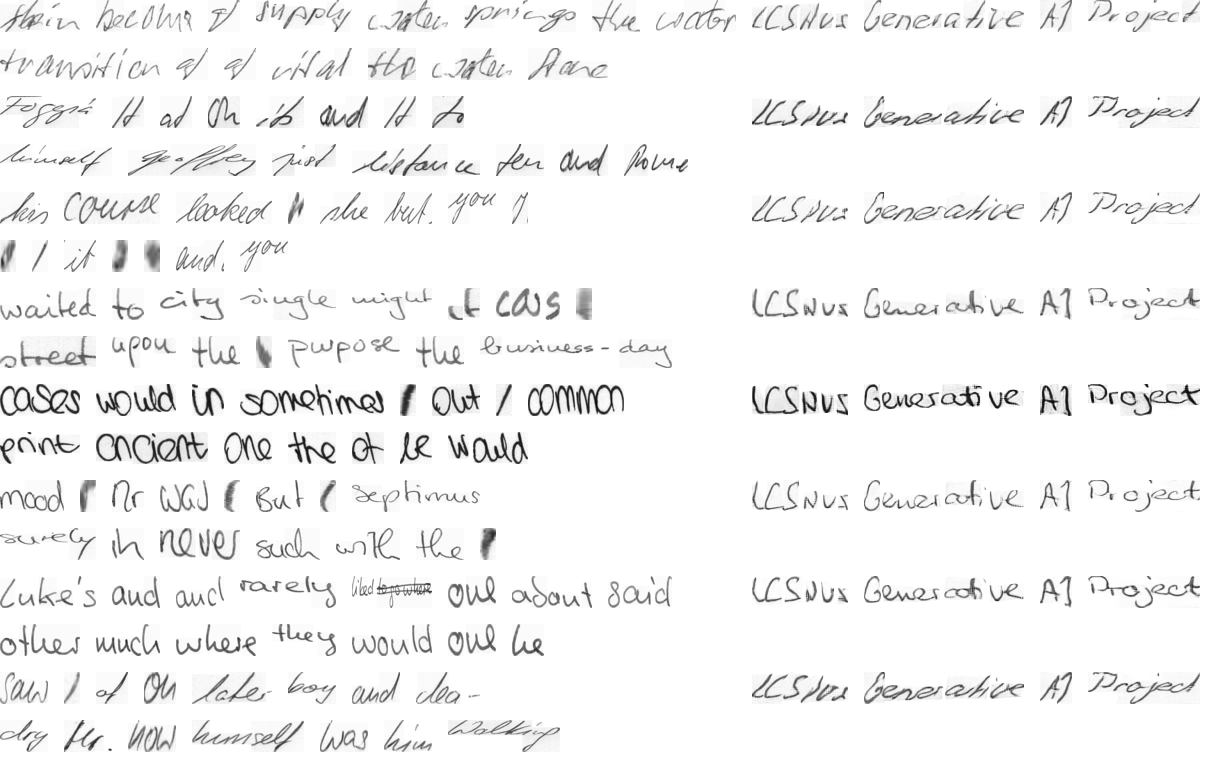

--------------------------------------------------------------------------------
Handwriting Style 11:


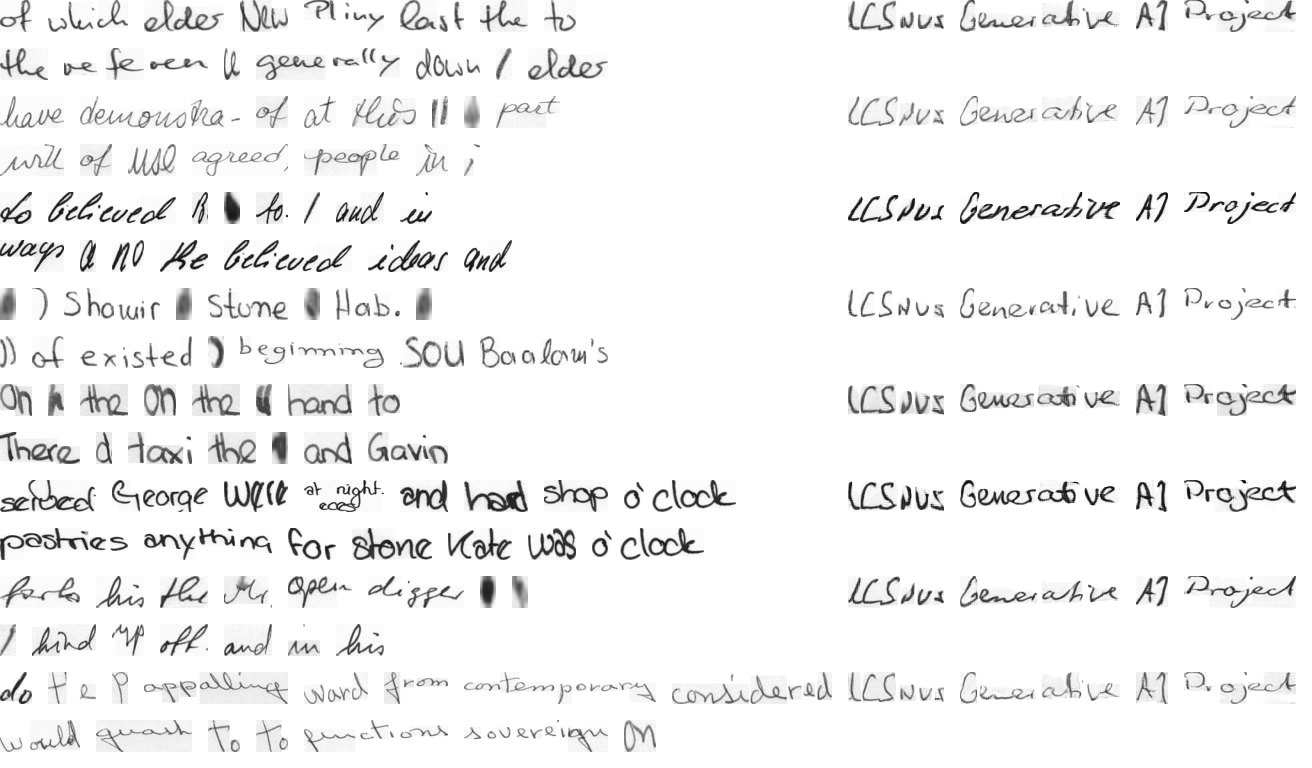

--------------------------------------------------------------------------------
Handwriting Style 12:


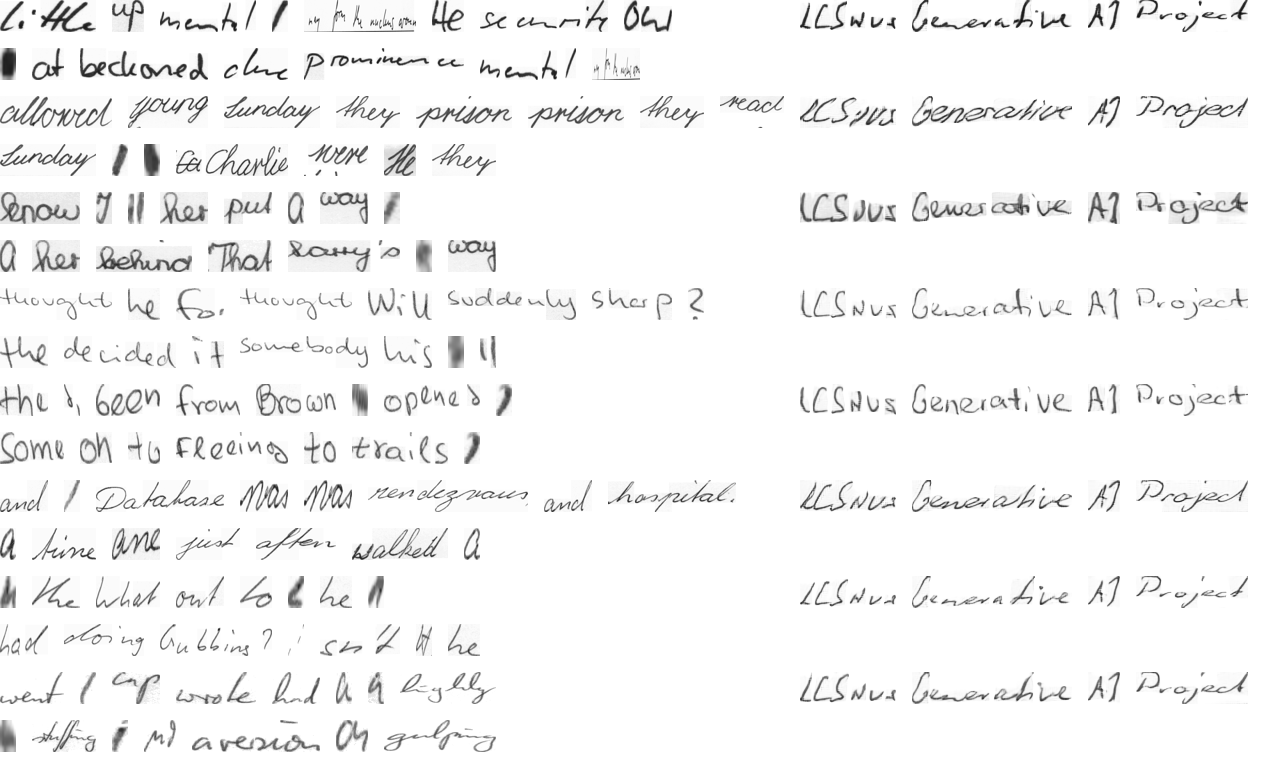

--------------------------------------------------------------------------------
Handwriting Style 13:


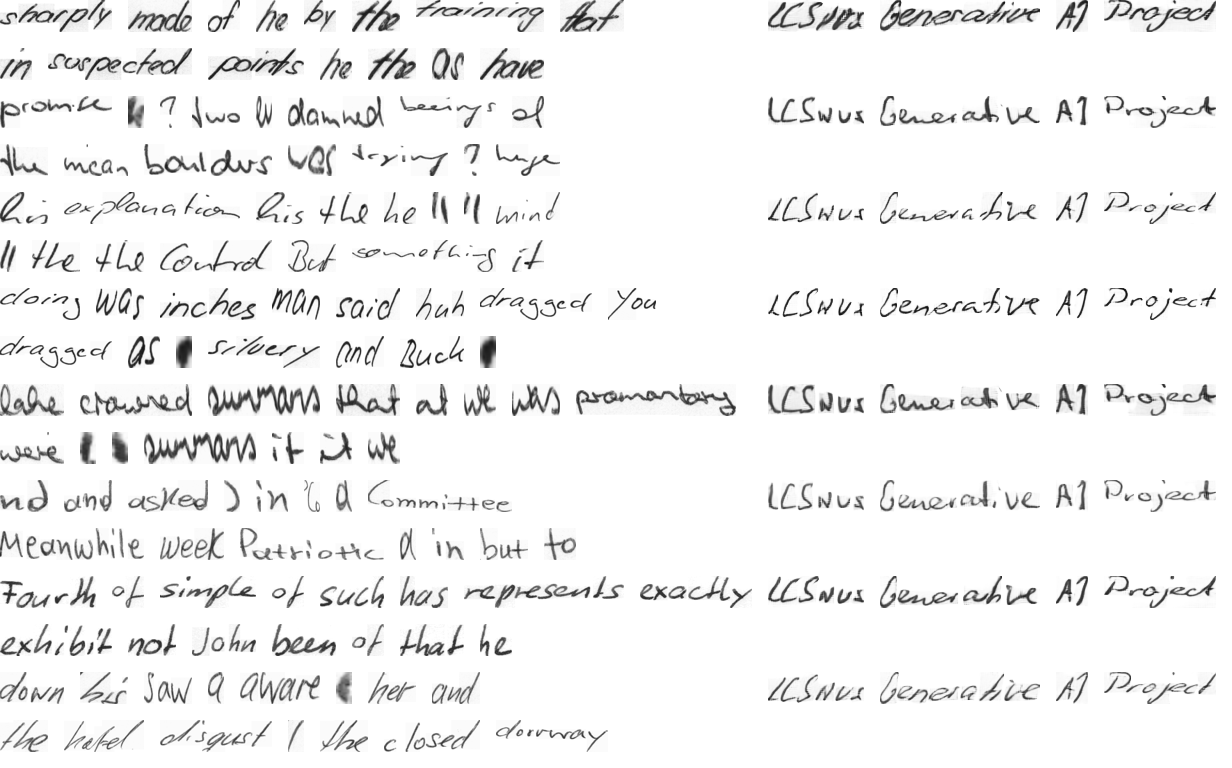

--------------------------------------------------------------------------------
Handwriting Style 14:


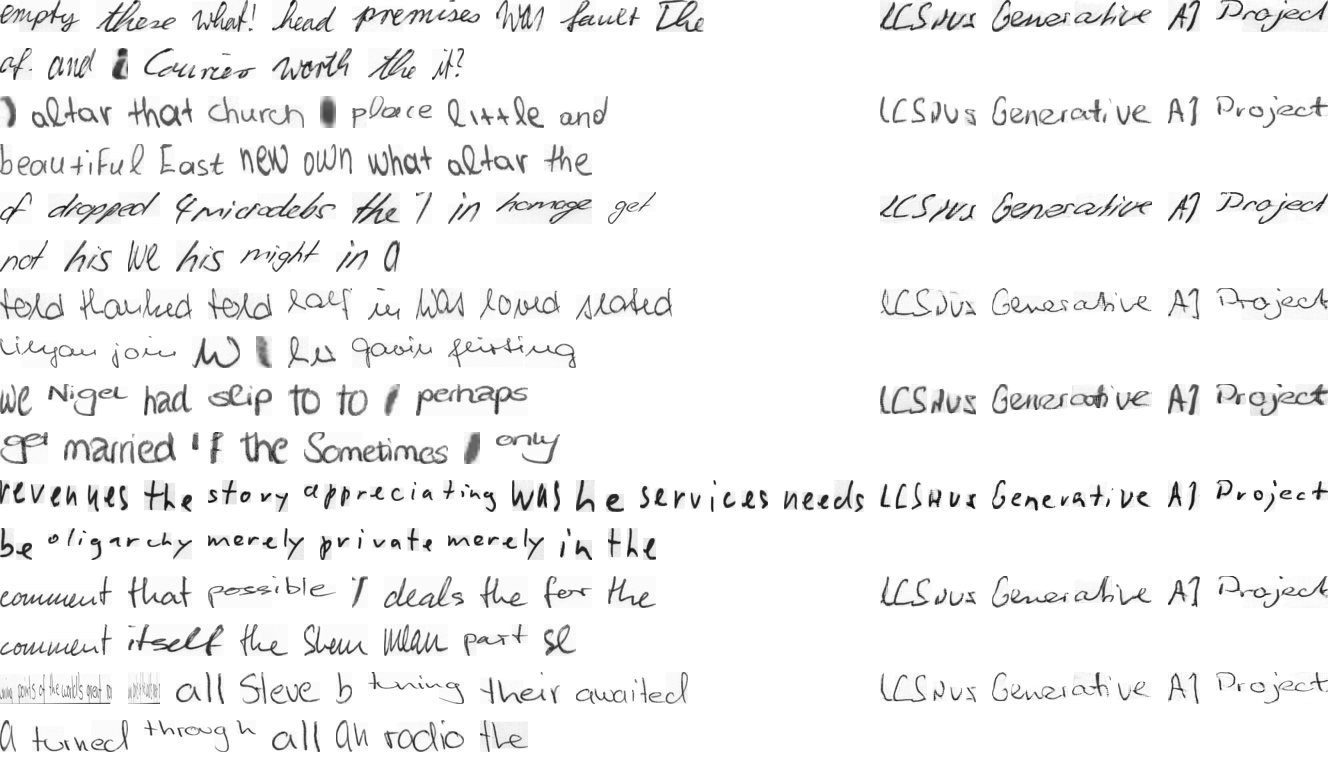

--------------------------------------------------------------------------------
Handwriting Style 15:


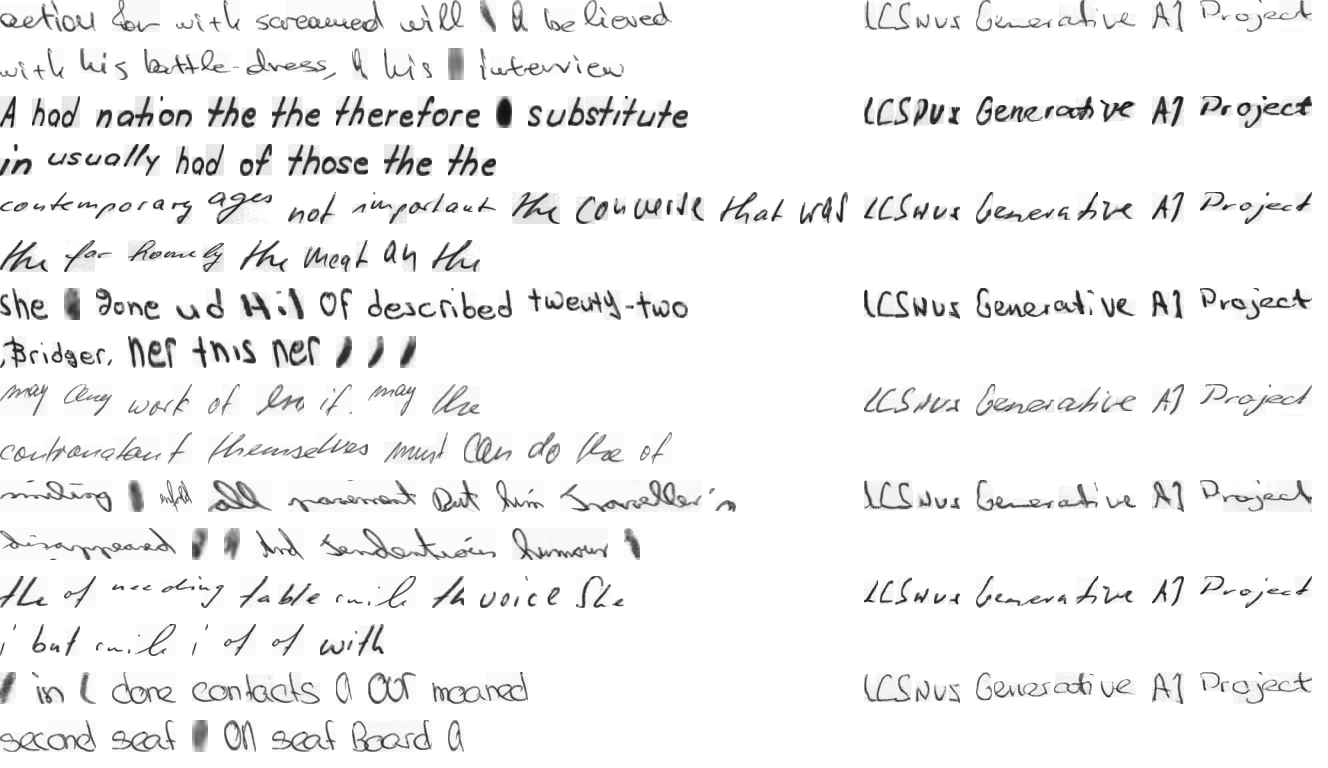

--------------------------------------------------------------------------------
Handwriting Style 16:


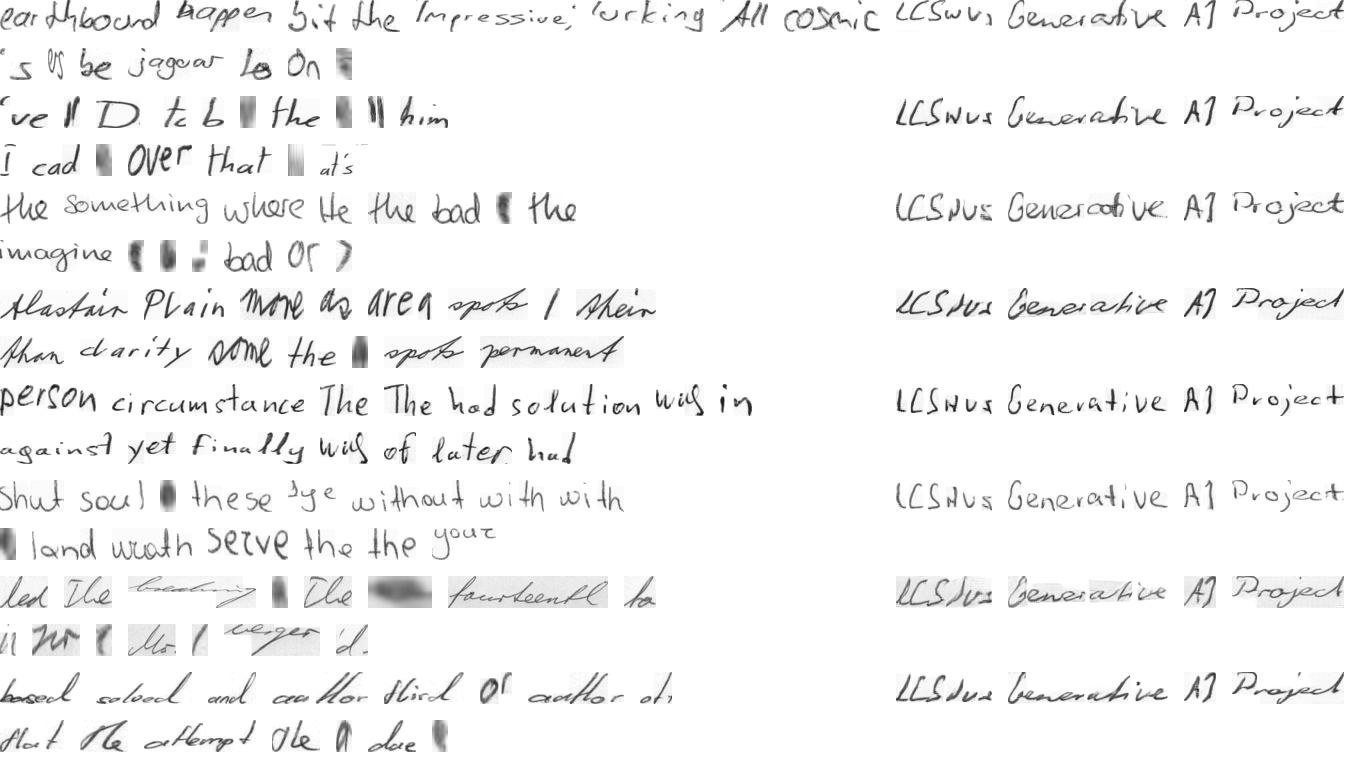

--------------------------------------------------------------------------------
Handwriting Style 17:


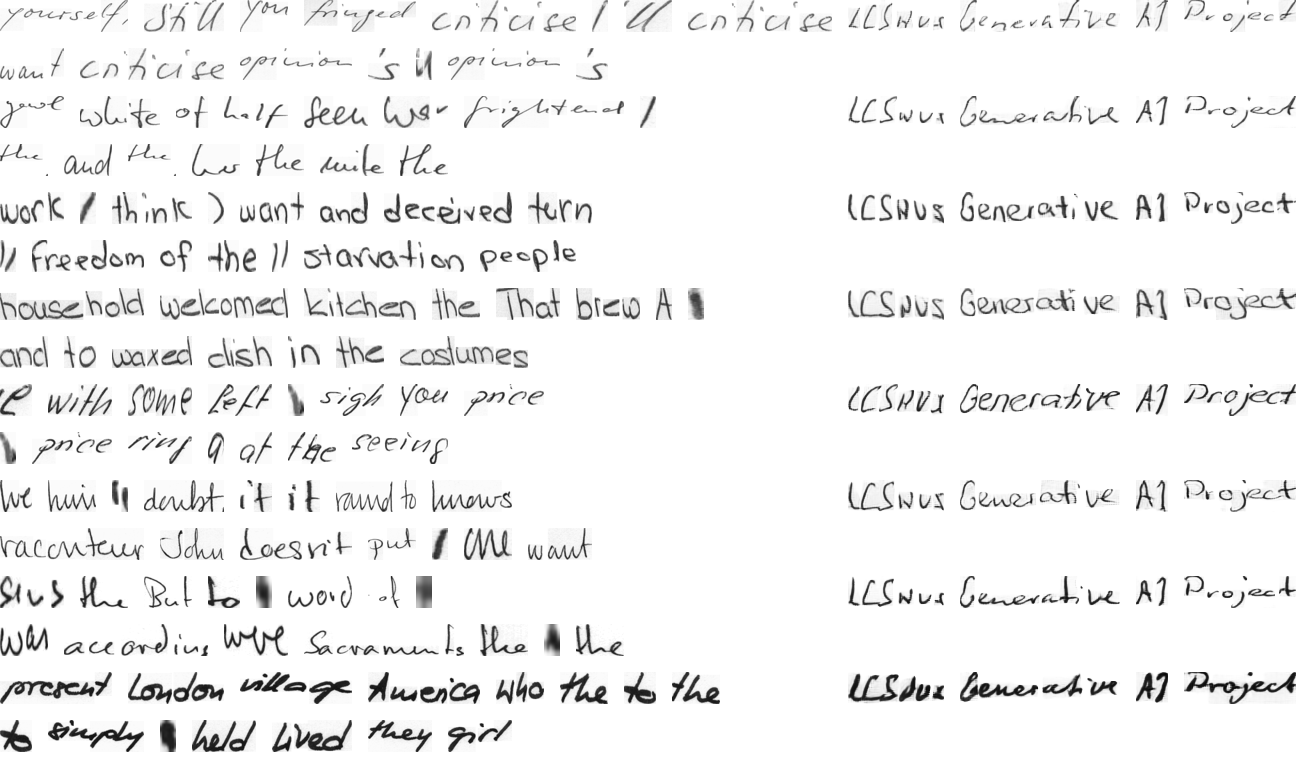

--------------------------------------------------------------------------------
Handwriting Style 18:


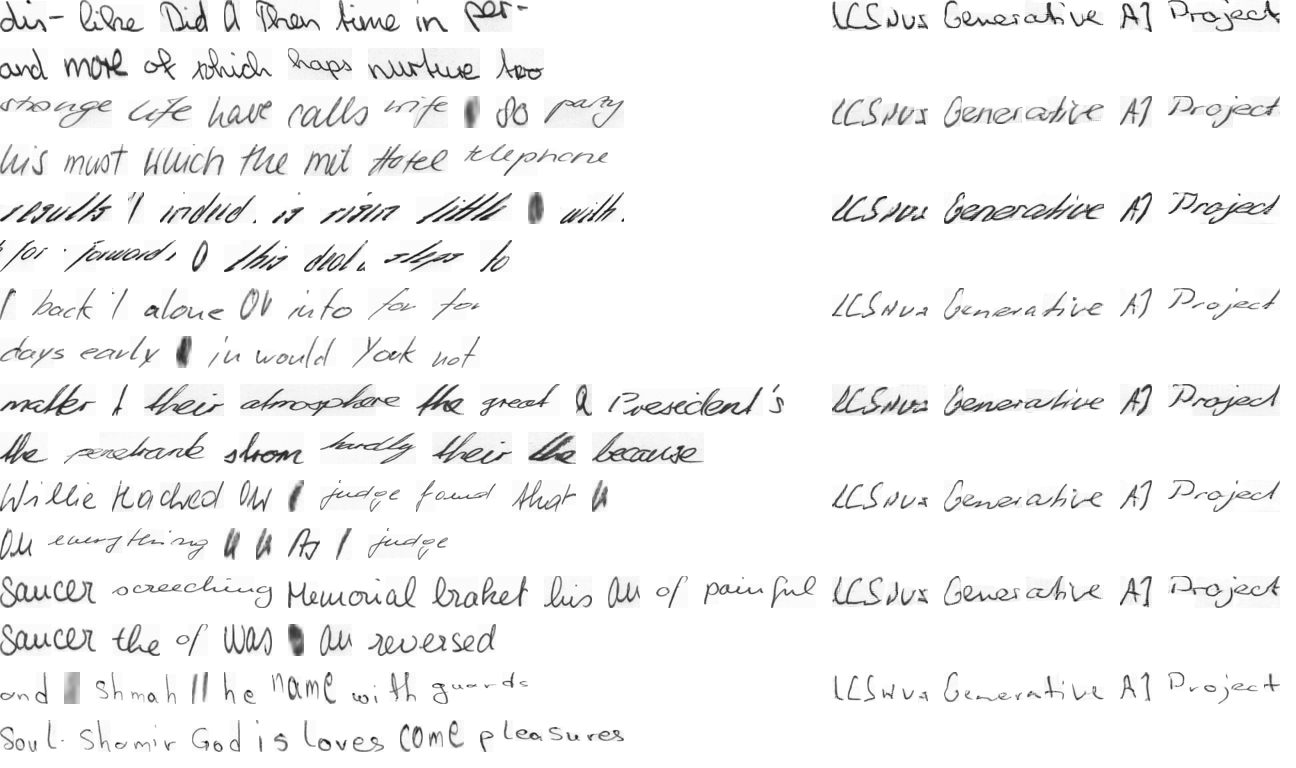

--------------------------------------------------------------------------------
Handwriting Style 19:


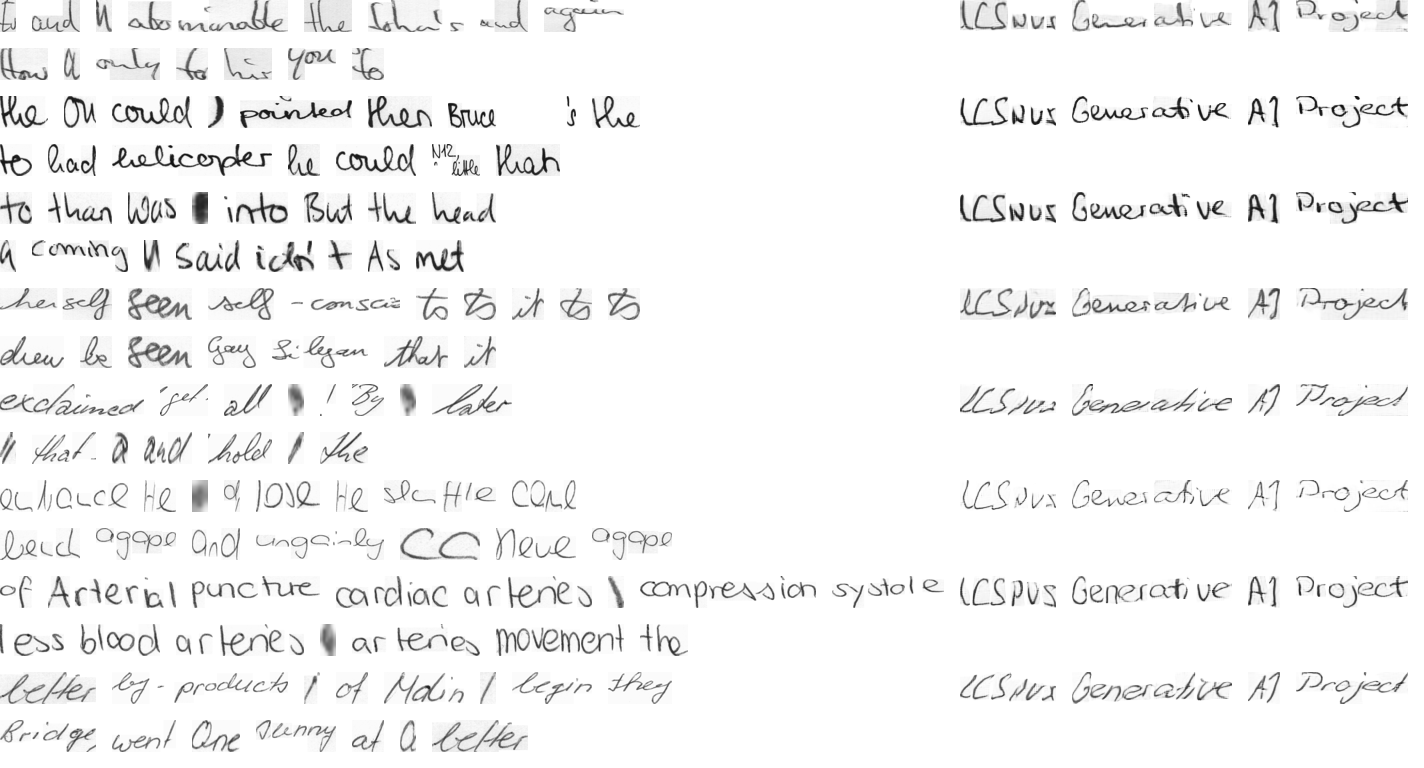

--------------------------------------------------------------------------------

GENERATION COMPLETE

✅ Model: my_trained_handwriting_model.pth
✅ Input: "UCS748 Generative AI Project"
✅ Generated: 20 handwriting samples
✅ Output: results/

Files:
  - results/image0.png
  - results/image1.png
  - results/image2.png
  - results/image3.png
  - results/image4.png
  - results/image5.png
  - results/image6.png
  - results/image7.png
  - results/image8.png
  - results/image9.png
  - results/image10.png
  - results/image11.png
  - results/image12.png
  - results/image13.png
  - results/image14.png
  - results/image15.png
  - results/image16.png
  - results/image17.png
  - results/image18.png
  - results/image19.png


💡 To generate more text, run:
   generate_new_text("Your custom text here")


In [3]:
# ============================================================================
# HANDWRITING GENERATION - USING MY TRAINED MODEL
# UCS748 - Generative AI | Ramneek - Thapar Institute
# ============================================================================

print("="*80)
print("HANDWRITING GENERATION")
print("UCS748 - Generative AI Project")
print("Student: Ramneek | Thapar Institute")
print("="*80)

# ============================================================================
# IMPORTS
# ============================================================================

import os
import torch
import cv2
import pickle
import sys
import glob
import tqdm
import shutil
from IPython.display import display, Image as IPImage
from PIL import Image

# Add path
sys.path.append('.')

# Import model components
from models.model import TRGAN
from params import *
from data.dataset import TextDatasetval

# ============================================================================
# SETUP
# ============================================================================

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"\n✅ Device: {DEVICE}")

# ============================================================================
# LOAD MY TRAINED MODEL
# ============================================================================

print("\n" + "="*80)
print("LOADING MY TRAINED MODEL")
print("="*80)

print("\n📥 Loading model for generation...")
print("   Model file: my_trained_handwriting_model.pth")
print("   This is the model I trained for 20 epochs")

# Initialize model
model = TRGAN()

# Load trained weights
model_path = 'files/iam_model.pth'
model.netG.load_state_dict(torch.load(model_path))
model.netG = model.netG.to(DEVICE)
model.eval()

print("✅ Model loaded successfully!")
print("   Generator ready for handwriting generation")

# ============================================================================
# LOAD STYLE DATASET
# ============================================================================

print("\n📊 Loading style dataset...")

data_path = 'files/IAM-32.pickle'

TextDatasetObjval = TextDatasetval(base_path=data_path, num_examples=15)

datasetval = torch.utils.data.DataLoader(
    TextDatasetObjval,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
    pin_memory=True,
    drop_last=True,
    collate_fn=TextDatasetObjval.collate_fn
)

print(f"✅ Loaded {len(datasetval)} style samples from IAM dataset")

# ============================================================================
# CUSTOM TEXT INPUT
# ============================================================================

print("\n" + "="*80)
print("TEXT GENERATION")
print("="*80)

# ===================================================================
# YOUR CUSTOM TEXT HERE - CHANGE THIS!
# ===================================================================
text = "UCS748 Generative AI Project"
# ===================================================================

print(f"\n✍️ Input text: '{text}'")

output_path = 'results'

# ============================================================================
# ENCODE TEXT
# ============================================================================

print("\n🔤 Encoding text using my trained model...")

# Encode the text
text_encode = [j.encode() for j in text.split(' ')]

# Use model's text converter
eval_text_encode, eval_len_text = model.netconverter.encode(text_encode)
eval_text_encode = eval_text_encode.to(DEVICE).repeat(batch_size, 1, 1)

print("✅ Text encoded successfully")
print(f"   Encoded tensor shape: {eval_text_encode.shape}")

# ============================================================================
# GENERATE HANDWRITING
# ============================================================================

print("\n" + "="*80)
print("GENERATING HANDWRITING")
print("="*80)

print(f"\n🎨 Generating handwriting using my trained model...")
print(f"   Model: my_trained_handwriting_model.pth")
print(f"   Text: '{text}'")

# Clean output directory
if os.path.isdir(output_path):
    shutil.rmtree(output_path)
os.makedirs(output_path, exist_ok=True)

# Generate with different styles
print(f"\n📸 Generating samples with different handwriting styles...")

for i, data_val in enumerate(tqdm.tqdm(datasetval, desc="Generating")):
    try:
        # Generate handwriting
        page_val = model._generate_page(
            data_val['simg'].to(DEVICE),
            data_val['swids'],
            eval_text_encode,
            eval_len_text
        )

        # Save image
        cv2.imwrite(f'{output_path}/image{i}.png', page_val * 255)

    except Exception as e:
        print(f"\n⚠️ Error on sample {i}: {e}")
        continue

print(f'\n✅ Output images saved in: {output_path}/')

# ============================================================================
# DISPLAY GENERATED IMAGES
# ============================================================================

print("\n" + "="*80)
print("GENERATED HANDWRITING RESULTS")
print("="*80)

print(f"\n📋 Displaying handwriting for: '{text}'")
print(f"   Generated using: my_trained_handwriting_model.pth\n")

# Get all generated images
image_files = glob.glob(f'{output_path}/image*.png')
image_files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

if not image_files:
    print("❌ ERROR: No images generated!")
else:
    print(f"✅ Generated {len(image_files)} handwriting samples\n")

    # Display each image
    for img_path in image_files:
        style_num = img_path.split('image')[1].split('.')[0]
        print(f"Handwriting Style {style_num}:")
        display(IPImage(filename=img_path))
        print("-" * 80)

# ============================================================================
# SUMMARY
# ============================================================================

print("\n" + "="*80)
print("GENERATION COMPLETE")
print("="*80)

print(f"""
✅ Model: my_trained_handwriting_model.pth
✅ Input: "{text}"
✅ Generated: {len(image_files)} handwriting samples
✅ Output: {output_path}/

Files:
{chr(10).join([f'  - {f}' for f in image_files])}
""")

# ============================================================================
# HELPER FUNCTION FOR NEW TEXT
# ============================================================================

def generate_new_text(new_text):
    """
    Generate handwriting for new text
    Usage: generate_new_text("Your text here")
    """
    print(f"\n🎨 Generating: '{new_text}'")

    # Encode
    text_encode = [j.encode() for j in new_text.split(' ')]
    eval_text_encode, eval_len_text = model.netconverter.encode(text_encode)
    eval_text_encode = eval_text_encode.to(DEVICE).repeat(batch_size, 1, 1)

    # Output path
    out_path = f'results_{new_text.replace(" ", "_")[:20]}'
    os.makedirs(out_path, exist_ok=True)

    # Generate
    for i, data_val in enumerate(tqdm.tqdm(datasetval)):
        try:
            page_val = model._generate_page(
                data_val['simg'].to(DEVICE),
                data_val['swids'],
                eval_text_encode,
                eval_len_text
            )
            cv2.imwrite(f'{out_path}/image{i}.png', page_val * 255)
        except:
            continue

    print(f"✅ Saved in: {out_path}/")

    # Display
    imgs = sorted(glob.glob(f'{out_path}/image*.png'))
    for img in imgs[:5]:
        display(IPImage(filename=img))

print("\n💡 To generate more text, run:")
print('   generate_new_text("Your custom text here")')